In [1]:
import os
import pickle
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
data_saved_dir = r'D:\My Code\Classification\pickle_data'
train_val_data_path = os.path.join(data_saved_dir, 'B_preprocessed_data(256, 256).pkl')
train_images, train_labels, val_images, val_labels = load_pickle(train_val_data_path)

In [3]:
random_state = 42

train_indices = np.arange(len(train_images))
np.random.seed(random_state)
np.random.shuffle(train_indices)
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]

val_indices = np.arange(len(val_images))
np.random.seed(random_state)
np.random.shuffle(val_indices)
val_images = val_images[val_indices]
val_labels = val_labels[val_indices]

In [4]:
IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (256,256,3))

model = Sequential()
model.add(IncV3)
    
for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(units = 2048, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 2048)              150996992 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 172,801,825
Trainable params: 150,999,041
Non-trainable params: 21,802,784
_________________________________________________________________


In [5]:
history = model.fit(train_images, train_labels, epochs = 50, batch_size = 32, validation_data = (val_images, val_labels))

Epoch 1/50
58/58 [==============================] - 14s 141ms/step - loss: 12.3509 - accuracy: 0.7598 - val_loss: 1.5014 - val_accuracy: 0.9116
Epoch 2/50
58/58 [==============================] - 5s 87ms/step - loss: 1.1556 - accuracy: 0.9104 - val_loss: 2.2455 - val_accuracy: 0.8567
Epoch 3/50
58/58 [==============================] - 5s 86ms/step - loss: 0.5041 - accuracy: 0.9401 - val_loss: 0.8911 - val_accuracy: 0.9055
Epoch 4/50
58/58 [==============================] - 5s 86ms/step - loss: 0.3402 - accuracy: 0.9509 - val_loss: 0.5510 - val_accuracy: 0.9177
Epoch 5/50
58/58 [==============================] - 5s 86ms/step - loss: 0.1036 - accuracy: 0.9746 - val_loss: 0.5279 - val_accuracy: 0.9116
Epoch 6/50
58/58 [==============================] - 5s 85ms/step - loss: 0.0911 - accuracy: 0.9763 - val_loss: 0.8378 - val_accuracy: 0.8750
Epoch 7/50
58/58 [==============================] - 5s 86ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.5044 - val_accuracy: 0.9238
Epoch 8/50

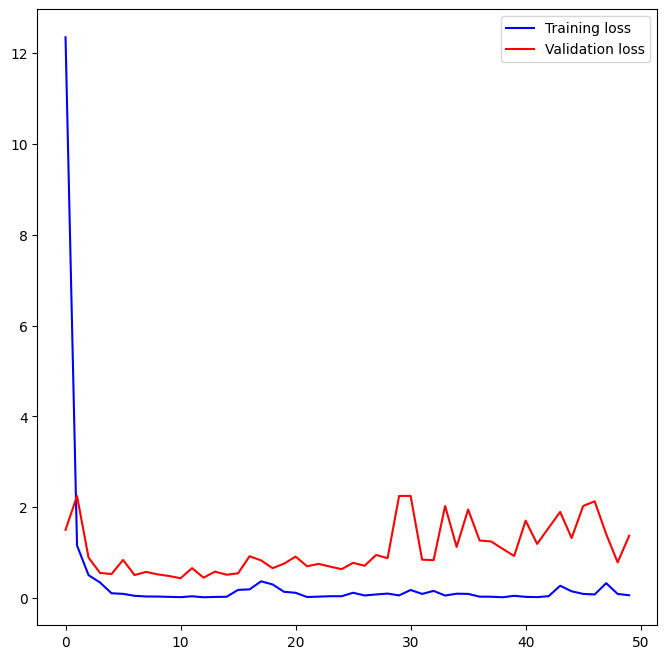

<Figure size 640x480 with 0 Axes>

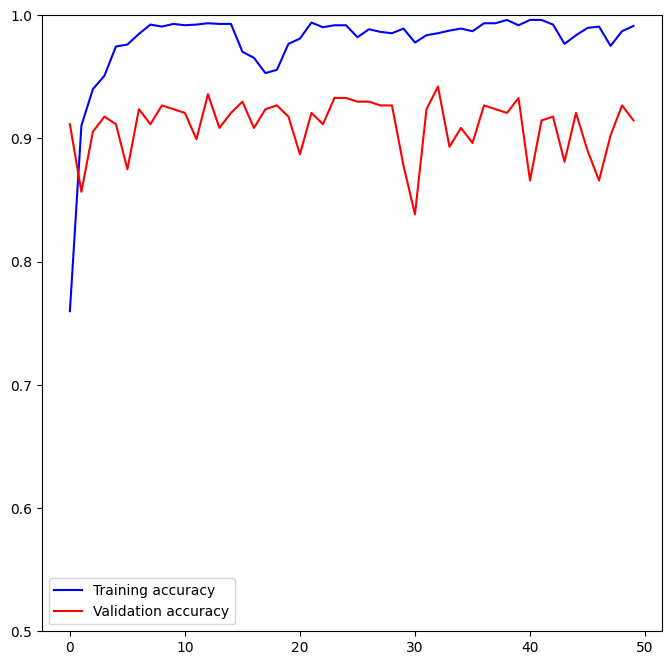

In [13]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.ylim(0.5, 1)
plt.show()

13/13 [==============================] - 3s 110ms/step


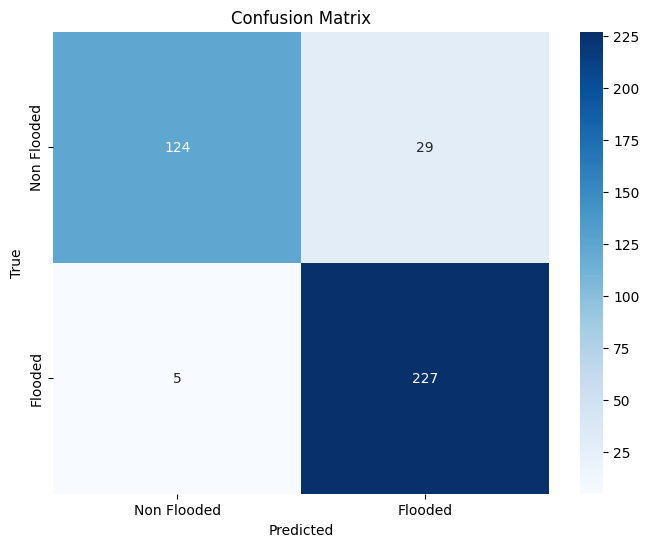

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       153
           1       0.89      0.98      0.93       232

    accuracy                           0.91       385
   macro avg       0.92      0.89      0.90       385
weighted avg       0.92      0.91      0.91       385



In [7]:
test_data_path = os.path.join(data_saved_dir, 'B_preprocessed_data test_images(256, 256).pkl')
test_images, test_labels = load_pickle(test_data_path)

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

In [8]:
model_saved = r'D:\My Code\Classification\models'
save_pickle(model, os.path.join(model_saved, 'B_InceptionV3 (256X256).pkl'))

INFO:tensorflow:Assets written to: ram://9b044a8b-b0af-47de-af57-53d987b01b1a/assets


INFO:tensorflow:Assets written to: ram://9b044a8b-b0af-47de-af57-53d987b01b1a/assets
